In [12]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import cv2 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import pickle

In [4]:
img=image.load_img('dataset/training_set/cats/cat.2.jpg')

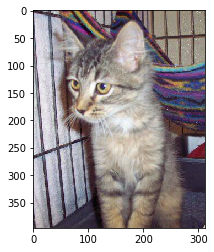

In [5]:
plt.imshow(img)

In [6]:
cv2.imread('dataset/training_set/cats/cat.1.jpg').shape

(280, 300, 3)

In [7]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset=train.flow_from_directory('dataset/training_set/',target_size=(200,200),batch_size=3,
                                                                                        class_mode='binary')

validation_dataset=validation.flow_from_directory('dataset/validation/',target_size=(200,200),batch_size=3,
                                                                                        class_mode='binary')


Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [26]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512,activation='relu'),

        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [13]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

In [14]:
model_fit=model.fit(
    train_dataset,
    steps_per_epoch=10,
    epochs=30,
    validation_data=validation_dataset
)

Epoch 1/30
10/10 [==============================] - 48s 5s/step - loss: 2.5685 - accuracy: 0.5333 - val_loss: 0.6876 - val_accuracy: 0.5025
Epoch 2/30
10/10 [==============================] - 43s 4s/step - loss: 0.7350 - accuracy: 0.3667 - val_loss: 0.6853 - val_accuracy: 0.5040
Epoch 3/30
10/10 [==============================] - 39s 4s/step - loss: 0.6864 - accuracy: 0.5333 - val_loss: 0.6889 - val_accuracy: 0.5155
Epoch 4/30
10/10 [==============================] - 40s 4s/step - loss: 0.6887 - accuracy: 0.4000 - val_loss: 0.6895 - val_accuracy: 0.5915
Epoch 5/30
10/10 [==============================] - 40s 4s/step - loss: 0.6779 - accuracy: 0.5667 - val_loss: 0.6905 - val_accuracy: 0.5275
Epoch 6/30
10/10 [==============================] - 46s 5s/step - loss: 0.8202 - accuracy: 0.5667 - val_loss: 0.6794 - val_accuracy: 0.5095
Epoch 7/30
10/10 [==============================] - 52s 5s/step - loss: 0.7390 - accuracy: 0.3667 - val_loss: 0.6914 - val_accuracy: 0.5045
Epoch 8/30
10/10 [==

In [1]:
dir_path='dataset/test_set/cats'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'/'+ i,target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)

    if val==0:
        print("this is a cat")
    else:
       print("this is a dog")



NameError: name 'image' is not defined